# Historical climate changes 

In this excercise we will investigate how climate on Earth has changed in the past from 1750 till today.

We will use a simple climate model (twobox) to explore the relative impact of natural and man-made climate forcing.

### Change to the correct directory

First make sure you are in the correct directory 

e.g. cd ~/Document/GitHub/twobox

In [45]:
cd ~/Documents/GitHub/twobox/

/Users/kerim/Documents/GitHub/twobox


In [46]:
pwd

'/Users/kerim/Documents/GitHub/twobox'

# Introduction to the twobox climate model

The twobox model is a simple climate model simulating the impact of radiative forcing on the Earth's energy balance, including the impact of greenhouse gases, volcanic activity and changes in solar radiation.

The model consists of two boxes; one representing the top ocean mixed layer and one box for the deeper ocean.

<img src="images/2D_model_schematic.png">

There is a balance between the radiation entering and leaving the top of the atmosphere (TOA). This is represented by the flux of energy between the atmosphere and the ocean mixed layer ocean ($\Delta Q$).  The model also accounts for the fluxes of energy entering the deeper ocean ($\gamma$).

The computation of the changes in temperature in the twobox climate model is based on the radiative balance as follows (and included in the Python file `twoboks.py`):

$$\begin{align}
c_{mix}\dfrac{d\Delta T_s}{dt}&=\Delta Q-\lambda \Delta T_s -\gamma (\Delta T_s -\Delta T_0)     \qquad   (\mathit{1}) \\
c_{deep}\dfrac{d\Delta T_o}{dt}&=\gamma (\Delta T_s - \Delta T_o)  \qquad   (\mathit{2}) 
\end{align}$$

where $c_{mix}$ and $c_{deep}$ is the heat capacity of the ocean mixed layer and deeper ocean, respectively. $\Delta T_s$ gives the changes in surface temperature, while $\Delta T_o$ gives the temperature in the deeper ocean. $\lambda$ represents the *climate feedbaks*, and $\gamma$ represents the heat uptake by the deeper ocean.

In [47]:
# Import relevant python packages
import pandas as pd
import matplotlib.pyplot as plt

# Include this line if you want to open this file in Jupyter Notebook to make interactive plots
%matplotlib inline 

# Imports the function calculating the temperature changes 
from twoboks import calculate_temp_anomalies 

## Setting up the twobox model
To apply the twobox model we must first load the radiative forcing data and calculate the total radiative forcing ($\Delta$Q). Next we must decide which *climate feedbacks* ($\lambda$) to include, and specify the strength of the *heat uptake by the deeper ocean* ($\gamma$).

### 1. Radiative forcing

Here we use historical data for the radiative forcing covering the period 1750 to 2011. The data are taken from the latest IPCC report (for more info see AR6 Chapter 7: https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter07.pdf)

We consider the following *radiative forcing*:

- greenhouse gases 
- solar radiation
- volcanism
- land use changes 
- aerosols (man-mande)

The total radiative forcing ($\Delta$Q) is given by:

$$\begin{align}
\Delta Q=\Delta Q_{drivhus} + \Delta Q_{sol} + \Delta Q_{vulkan} + \Delta Q_{arealbruk} + \Delta Q_{aerosoler} 
\end{align}$$


In [68]:
# read the historical forcing from the file 'historical_IPCC6.csv' and store it in variable "df"
df=pd.read_csv('forcing_files/historical_IPCC6.csv',index_col = 0,sep=';',encoding = "utf-8")

# show the data
df

,Greenhouse gases,Solar radiation,Volcanism,Land-use change,Aerosols
Year,,,,,
1750,0.000,0.098,0.200,0.000,0.000
1751,0.002,0.079,0.200,0.000,0.005
1752,0.004,0.049,0.200,0.000,0.009
1753,0.006,0.013,0.200,-0.001,0.005
1754,0.008,-0.021,0.200,-0.001,-0.003
...,...,...,...,...,...
2015,3.139,0.029,0.110,-0.199,-1.117
2016,3.195,-0.008,0.127,-0.199,-1.087
2017,3.233,-0.017,0.151,-0.199,-1.063


### Plot the different radiative forcing

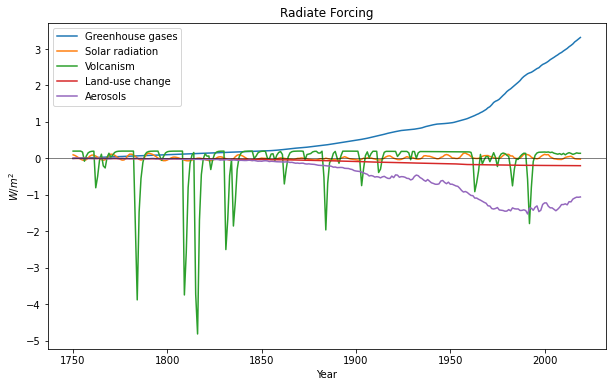

In [69]:
# This plots all the individual radiative forcings stored in the array df
df.plot(title="Radiate Forcing",ylabel="$W/m^2$", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7)


### Part I - Questions

* Which of the radiative forcings are natrual and which are man-made?

* What is the meaning of negative / positiv radiative forcing?

* How do you think negative / positive radiative forcing will impact the surface temperature on Earth?

## 2. Calculate the combined radiate forcing
Using the code below we will create a new variable including the combined radiate forcing

First - define switches for radiative forcing

In [97]:
# These switches come in handy later for investigating the impact of individual radiative forcings
witch_ghg    = 1  # Greenhouse gas forcing on=1 off=0
switch_solar = 1  # Solar forcing on=1 off=0
switch_volc  = 1  # Volcanic forcing on=1 off=0
switch_land  = 1  # Landuse forcing on=1 off=0
switch_aero  = 1  # Pollution particle forcing on=1 off=0

<function matplotlib.pyplot.legend(*args, **kwargs)>

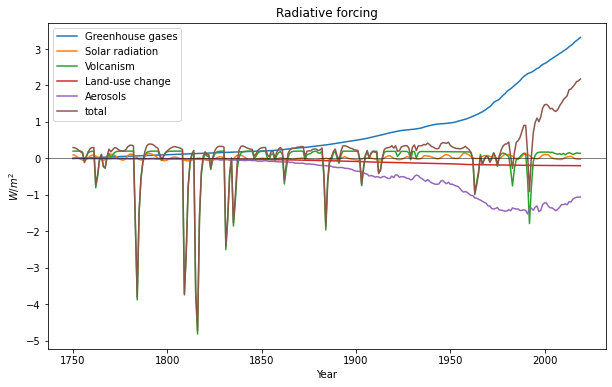

In [98]:
# Calculate and plot the combined radiative forcing (by adding the variable 'total' to the array 'df')
#df['total'] = switch_ghg*df['Greenhouse gases']+switch_solar*df['Solar radiation']+switch_volc*df['Volcanism']+switch_land*df['arealbruk']+switch_aero*df['aerosoler']
df['total'] = switch_ghg*df['Greenhouse gases']+switch_solar*df['Solar radiation'] \
  +switch_volc*df['Volcanism']+switch_land*df['Land-use change']+switch_aero*df['Aerosols']

# plot
df.plot(title="Radiative forcing",ylabel="$W/m^2$", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7)
plt.legend

### Part II - Questions

* Which of the different forcing is most important for the total radiative forcing before 1900?

* Is there a change in which forcing is most important after 1900?

* Are there any particular periods / years which are different? Why?


## 3. Add Climate feedbacks to the model

To run the twobox models we use the following values for feedback factors $\lambda$ taken from the last IPCC report AR6 as given in the table below (based on 14 different climate models).

Climate feedbacks are the focus of the next python excercise - however, please feel free to experiment with the values given. 

<img src="images/table_lambda_values.png" style="width:70%">

In [99]:
# CMIP5 values
lambda_planck=-3.21     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]
lambda_lapse=-0.84      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]
lambda_water=1.8       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]
lambda_cloud=0.69      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]
lambda_albedo=0.26     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]
lambda_other=0.0       # Other feedbacks [Wm-2K-1]

lambda_sum=sum([lambda_planck,
    lambda_lapse,
    lambda_water,
    lambda_cloud,
    lambda_albedo,
    lambda_other])

### 3. Bestem varmeoptakk til dybhavet

 Effektiviteten til varmeopptaket til dyphavet settes til 
`gamma`=-0.69 W`m^{-2}``K^{-1}`fra Dufresne and Bony (2008). 

In [100]:
# Deep ocean heat uptake efficency [Wm-2K-1] fra Dufresne and Bony (2008).
gamma=-0.69  # best guesses [-1 to -0.5]

## Beregn temperaturendringer for perioden 1750-2011 med Toboksmodellen
Vi ønsker nå å beregne hvordan temperaturen endrer seg som resultat av strålingspådrivet, verdiene vi har satt for tilbakekoblingsmekanismer, og varmeutveksling til dybhavet. 

In [101]:
Ts, To = calculate_temp_anomalies(df['total'].to_numpy(), lambda_sum, gamma) # kaller opp funksjonen som regner ut temperaturendringene

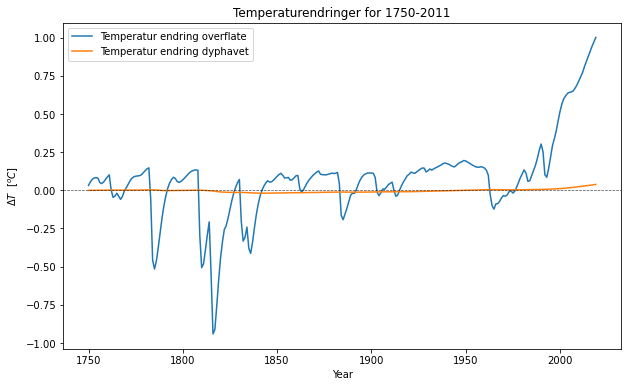

In [108]:
temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer (i.e. årstal) som pådrivet
temp['Temperatur endring overflate']=Ts
temp['Temperatur endring dyphavet']=To
temp.plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer for 1750-2011", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

### Beregn temperaturendringen relativ til år 1750

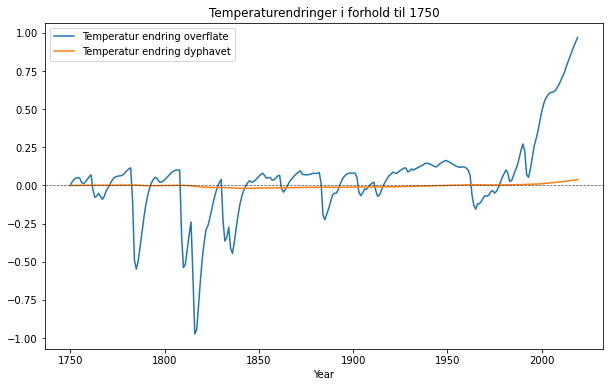

In [109]:
Tanom = temp - temp.loc[1750]
Tanom.plot( title="Temperaturendringer i forhold til 1750", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

### Finn temperaturen for et bestemt år

In [110]:
# velg år
år = 2011

Tloc = Tanom.loc[år]
Tloc
print('Relativ temperaturendring (overflate) i år', år, ':', "%.2f" %(Tloc['Temperatur endring overflate']),'°C')

Relativ temperaturendring (overflate) i år 2011 : 0.71 °C


### Temperaturendringer oppdelt etter strålingspådriv 
Noen ganger så ønsker man bare å studere effektene av eksempelvis solens aktivitet. I koden under beregner vi temperaturendringene for hver av de ulike strålingspådriv.  

## Spørgsmål - Del III

* Forklar hva du ser på plottet. 
    * Ka du si noe om endringene i overflatetemperaturen ($T_s$) gjennom perioden 1750-2011?
* Hvor mye har overflatetemperaturen (*Ts*) endret sig i forhold til år 1750? 

* Hva er den primære årsakken til denne endringen?



## Sammenlikne med obsevert temperaturendringer (EKSTRA???)

* Hvordan passer vores plot med det fra IPCC rapporten (AR6)?

Figuren under viser den obseverte samt simulert endring i global middelstemperatur hentet fra den seneste IPCC rapporten (AR6).  

<figure>
<img src="bilder/AR6_figSPM1b-600x528.png" >
<figcaption align = "center"> Source: AR6 Fig SPM1b</figcaption>
</figure>